<a href="https://colab.research.google.com/github/siti-alawiyah/ibresultprediction/blob/main/Linear_Model_1.01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Since the aim of the project is to predict a student's IB score based on a subject, I shall take all columns that are related to mathematics.

# Import Data

In [1]:
# imports
# ignore future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn import metrics

import statsmodels.api as sm
from scipy import stats

In [2]:
# links to dataset
URL1 = "https://raw.githubusercontent.com/siti-alawiyah/ibresultprediction/main/data/2020IB.csv"
URL2 = "https://raw.githubusercontent.com/siti-alawiyah/ibresultprediction/main/data/2019IB.csv"
URL3 = "https://raw.githubusercontent.com/siti-alawiyah/ibresultprediction/main/data/2018IB.csv"   
URL4 = "https://raw.githubusercontent.com/siti-alawiyah/ibresultprediction/main/data/2017IB.csv"      

In [3]:
# read the url for the datasets
df20 = pd.read_csv(URL1)
df19 = pd.read_csv(URL2)
df18 = pd.read_csv(URL3)
df17 = pd.read_csv(URL4)

In [4]:
# getting the columns prior for modelling
col_name = ["StudentID","Ma Std","Ma Teacher","Ma ATL","Ma Compl. Of Work","Ma Sub Achievement","Predicted Grade","Actual Grade","Scaled Total"]

df20 = df20[col_name]
df19 = df19[col_name]
df18 = df18[col_name]
df17 = df17[col_name]

In [5]:
# combine the dataframes into 1 before modelling
frames = [df20,df19,df18,df17]
df = pd.concat(frames,ignore_index=True )

In [6]:
df.head()

,StudentID,Ma Std,Ma Teacher,Ma ATL,Ma Compl. Of Work,Ma Sub Achievement,Predicted Grade,Actual Grade,Scaled Total
0,1.154050e+11,SL,BGe,7.0,7.0,6.0,6.0,6.0,74.0
1,9.544171e+10,HL,GGo,6.0,6.0,6.0,6.0,6.0,69.0
2,1.146250e+11,HL,JTo,5.0,5.0,4.0,4.0,4.0,44.0
3,1.616420e+11,SL,LLP,7.0,7.0,6.0,6.0,6.0,76.0
4,1.416540e+11,SL,CNa,5.0,5.0,4.0,5.0,5.0,57.0


In [7]:
df['Ma Teacher'].unique()

array(['BGe', 'GGo', 'JTo', 'LLP', 'CNa', 'RCh', 'FYi', nan, 'GTu',
       ' SSn', ' RCh', ' CLe', ' CNa', ' BGe', ' FBe', 'Gtu', 'TSS',
       'FBe', 'CLe', 'DCh'], dtype=object)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681 entries, 0 to 680
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   StudentID           681 non-null    float64
 1   Ma Std              657 non-null    object 
 2   Ma Teacher          657 non-null    object 
 3   Ma ATL              657 non-null    float64
 4   Ma Compl. Of Work   654 non-null    float64
 5   Ma Sub Achievement  657 non-null    float64
 6   Predicted Grade     654 non-null    float64
 7   Actual Grade        652 non-null    float64
 8   Scaled Total        653 non-null    float64
dtypes: float64(7), object(2)
memory usage: 48.0+ KB


In [9]:
df.isnull().sum()

StudentID              0
Ma Std                24
Ma Teacher            24
Ma ATL                24
Ma Compl. Of Work     27
Ma Sub Achievement    24
Predicted Grade       27
Actual Grade          29
Scaled Total          28
dtype: int64

In [10]:
#drop rows that have null values
df.dropna(axis=0, inplace=True)

Removing the null values as the students do not take the subject to have any grades.

In [11]:
df.isnull().sum()

StudentID             0
Ma Std                0
Ma Teacher            0
Ma ATL                0
Ma Compl. Of Work     0
Ma Sub Achievement    0
Predicted Grade       0
Actual Grade          0
Scaled Total          0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 650 entries, 0 to 680
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   StudentID           650 non-null    float64
 1   Ma Std              650 non-null    object 
 2   Ma Teacher          650 non-null    object 
 3   Ma ATL              650 non-null    float64
 4   Ma Compl. Of Work   650 non-null    float64
 5   Ma Sub Achievement  650 non-null    float64
 6   Predicted Grade     650 non-null    float64
 7   Actual Grade        650 non-null    float64
 8   Scaled Total        650 non-null    float64
dtypes: float64(7), object(2)
memory usage: 50.8+ KB


a total of 650 rows left after removing the null values. initially there were 681 rows.


# Correlation Plot

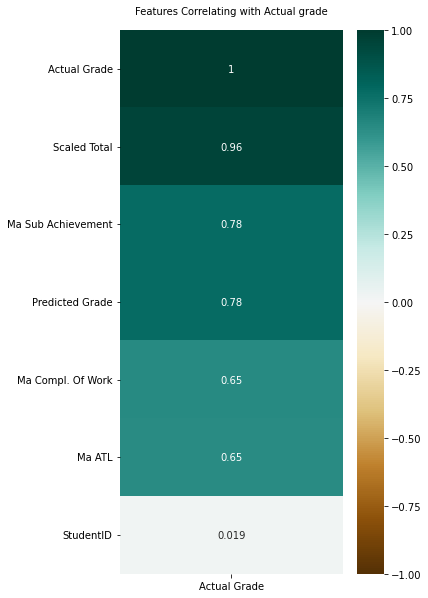

In [13]:
plt.figure(figsize=(5, 10))
heatmap = sns.heatmap(df.corr()[['Actual Grade']].sort_values(by='Actual Grade', ascending=False), 
                      vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Actual grade', fontdict={'fontsize':10}, pad=16);

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 650 entries, 0 to 680
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   StudentID           650 non-null    float64
 1   Ma Std              650 non-null    object 
 2   Ma Teacher          650 non-null    object 
 3   Ma ATL              650 non-null    float64
 4   Ma Compl. Of Work   650 non-null    float64
 5   Ma Sub Achievement  650 non-null    float64
 6   Predicted Grade     650 non-null    float64
 7   Actual Grade        650 non-null    float64
 8   Scaled Total        650 non-null    float64
dtypes: float64(7), object(2)
memory usage: 50.8+ KB


# 1.0 Data Preprocessing

In [15]:
# dummify Ma Std and Ma Teacher
col= ['Ma Std','Ma Teacher']

# Creaing dummies 
df= pd.get_dummies(columns=col, data=df)

In [16]:
df.head()

,StudentID,Ma ATL,Ma Compl. Of Work,Ma Sub Achievement,Predicted Grade,Actual Grade,Scaled Total,Ma Std_ HL,Ma Std_ SL,Ma Std_HL,Ma Std_SL,Ma Teacher_ BGe,Ma Teacher_ CLe,Ma Teacher_ CNa,Ma Teacher_ FBe,Ma Teacher_ RCh,Ma Teacher_ SSn,Ma Teacher_BGe,Ma Teacher_CLe,Ma Teacher_CNa,Ma Teacher_DCh,Ma Teacher_FBe,Ma Teacher_FYi,Ma Teacher_GGo,Ma Teacher_GTu,Ma Teacher_Gtu,Ma Teacher_JTo,Ma Teacher_LLP,Ma Teacher_RCh,Ma Teacher_TSS
0,1.154050e+11,7.0,7.0,6.0,6.0,6.0,74.0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,9.544171e+10,6.0,6.0,6.0,6.0,6.0,69.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1.146250e+11,5.0,5.0,4.0,4.0,4.0,44.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1.616420e+11,7.0,7.0,6.0,6.0,6.0,76.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1.416540e+11,5.0,5.0,4.0,5.0,5.0,57.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [17]:
# create train test split 
X = df.drop(['Predicted Grade','Actual Grade','Scaled Total','StudentID'],axis=1)
y = df['Actual Grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [18]:
X.columns

Index(['Ma ATL', 'Ma Compl. Of Work', 'Ma Sub Achievement', 'Ma Std_ HL',
       'Ma Std_ SL', 'Ma Std_HL', 'Ma Std_SL', 'Ma Teacher_ BGe',
       'Ma Teacher_ CLe', 'Ma Teacher_ CNa', 'Ma Teacher_ FBe',
       'Ma Teacher_ RCh', 'Ma Teacher_ SSn', 'Ma Teacher_BGe',
       'Ma Teacher_CLe', 'Ma Teacher_CNa', 'Ma Teacher_DCh', 'Ma Teacher_FBe',
       'Ma Teacher_FYi', 'Ma Teacher_GGo', 'Ma Teacher_GTu', 'Ma Teacher_Gtu',
       'Ma Teacher_JTo', 'Ma Teacher_LLP', 'Ma Teacher_RCh', 'Ma Teacher_TSS'],
      dtype='object')

In [19]:
# instantiate standard scaler
sc = StandardScaler()

# fit standard scaler on train set
X_train_sc = sc.fit_transform(X_train)

# transform test set 
X_test_sc = sc.transform(X_test)


In [20]:
# functions for comparing models 

# RMSE function
def rmse(model, X, y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse.mean())

#compare train, test, and cv score
def display_r2(model, X_train, y_train, X_test, y_test):
    print('Train Score: ', round(model.score(X_train,y_train),7))
    print('Test Score: ', round(model.score(X_test, y_test),7))
    print('Cross Val Score:', round(cross_val_score(model, X_test,y_test).mean(),7))

# model comparisons
model_dictionary = {}
def add_model(name, model, X_test, y_test):
    model_dictionary[name] = [round(rmse(model,X_test,y_test),7), #RMSE
                              round(model.score(X_test, y_test),7)] #r2 score
    return pd.DataFrame.from_dict(model_dictionary, orient = 'index', columns=['RMSE', 'R2 Score'])
    
# Plot Residuals and Predictions
def plot_pred(model, X_test, y_test):
    pred = model.predict(X_test)
    
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,7))
    
    #Plot Residuals
    ax1.set_title('Residuals Plot')
    ax1.set(xlabel='Predicted values', ylabel='Residuals')
    ax1.scatter(pred, y_test - pred)
    ax1.hlines(y = 0, xmin = min(pred), xmax = max(pred), colors='red', linestyles='solid')
    
    #Plot Predictions
    ax2.set_title('Predictions vs Actuals')
    ax2.set(xlabel='Predicted values', ylabel='Actual Values')
    ax2.scatter(pred, y_test)
    
    lims = [
    np.min([ax2.get_xlim(), ax2.get_ylim()]),  # min of both axes
    np.max([ax2.get_xlim(), ax2.get_ylim()]),  # max of both axes
    ]
    
    ax2.plot(lims, lims, 'k-', c = 'red', zorder=0)
                              
    plt.show()

# 2.0 Modelling
* 2.1 Baseline Model
* 2.2 Linear Regression
* 2.3 Ridge Regression 
* 2.4 Lasso Regression


### 2.1 Baseline

In [21]:
mean_yhat = y_train.mean()

In [22]:
# Create dataframe of actual and predicted sale price for test set
baseline = pd.DataFrame(y_test)
baseline['yhat'] = mean_yhat

In [23]:
# Calculate RMSE for test set
print('RMSE :',(np.mean(np.square(np.expm1(y_test) - np.expm1(mean_yhat)) ** 0.5)))

#Calculate r2 score
print('r2 score:', metrics.r2_score(baseline['Actual Grade'], baseline['yhat']))

RMSE : 261.04692888537073
r2 score: -0.0002563633484908845


In [24]:
model_dictionary = {'Baseline': [np.mean(np.square(y_test - mean_yhat)) ** 0.5, #RMSE
                                 metrics.r2_score(baseline['Actual Grade'], baseline['yhat'])]} #r2 Score

## 2.2 Linear Regression

compare the RMSE, train test score as well as R2

In [25]:
# instantiate linear regression 
lm = LinearRegression()

# fit linear regression model on train data
lm.fit(X_train_sc,y_train)

LinearRegression()

In [26]:
# compare train, test, cv scores
display_r2(lm, X_train_sc, y_train, X_test_sc, y_test)

Train Score:  0.6871283
Test Score:  0.6242078
Cross Val Score: 0.5922114


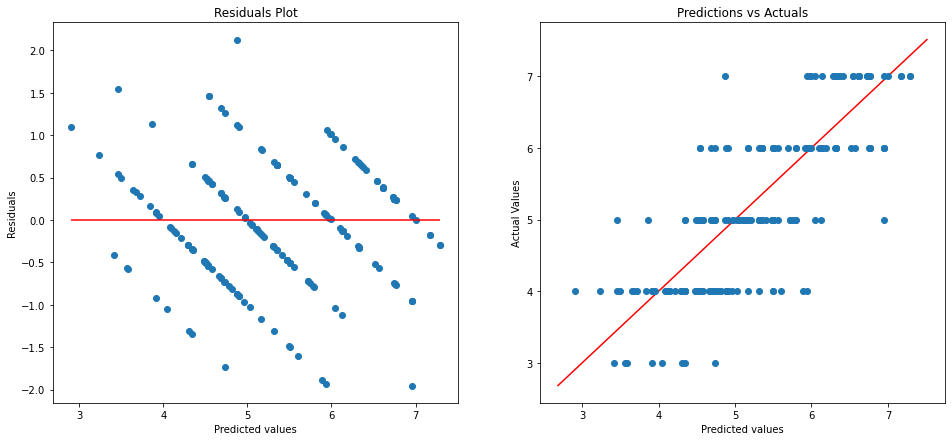

In [27]:
# plot residuals and prediction vs actual
plot_pred(lm, X_test_sc, y_test)

In [28]:
# add model for comparison
add_model('LinReg Default', lm, X_test_sc, y_test)

,RMSE,R2 Score
Baseline,1.144024,-0.000256
LinReg Default,0.718962,0.624208


## 2.3 Ridge Regression with hyperparameter tuning

In [29]:
# choose values of alpha to train
r_alphas = np.logspace(0.01, 50, 700)

# instantiate ridgeCV
ridge_cv = RidgeCV(alphas=r_alphas, scoring='neg_root_mean_squared_error', cv=5)

# fit ridgeCV to train data
ridge_cv = ridge_cv.fit(X_train_sc, y_train)

I have tried various start and stop numbers for alpha to get the closest (difference) in the train/test score. But there was no change at all. 

In [30]:
# store best value for alpha
ridge_a = ridge_cv.alpha_

In [31]:
#instantiate ridge with best value for alpha
ridge_tuned = Ridge(alpha = ridge_a )

#fit ridge to train data
ridge_tuned.fit(X_train_sc, y_train)

Ridge(alpha=16.81820668060909)

In [32]:
# compare train, test, cv scores
display_r2(ridge_tuned, X_train_sc, y_train, X_test_sc, y_test)

Train Score:  0.6860768
Test Score:  0.62892
Cross Val Score: 0.5895141


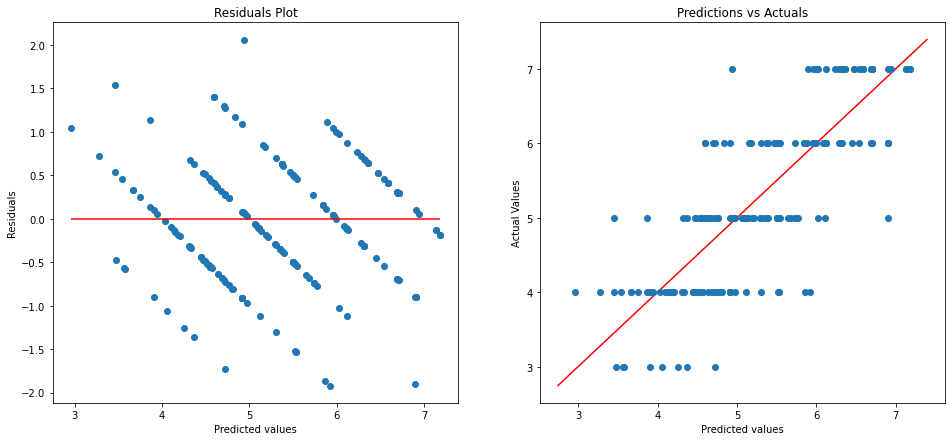

In [33]:
# plot residuals and prediction vs actual
plot_pred(ridge_tuned, X_test_sc, y_test)

In [34]:
# add model for comparison
add_model('Ridge with Hyperparameter Tuning', ridge_tuned, X_test_sc, y_test)

,RMSE,R2 Score
Baseline,1.144024,-0.000256
LinReg Default,0.718962,0.624208
Ridge with Hyperparameter Tuning,0.720323,0.628920


## 2.4 Lasso Regression with hyperparameter tuning

In [35]:
# choose values of alpha to train
l_alphas = np.logspace(-3, 50, 700)

# instantiate lassoCV
lasso_cv = LassoCV(alphas=l_alphas, cv=5, max_iter=80000)

# fit lassoCV to train data
lasso_cv.fit(X_train_sc, y_train);


In [36]:
# store best value for alpha
lasso_a = lasso_cv.alpha_

In [37]:
# instantiate lasso with new alpha
lasso_tuned = Lasso(alpha = lasso_a )

# fit lasso to train data
lasso_tuned.fit(X_train_sc, y_train)

Lasso(alpha=0.006824151202508981)

In [38]:
# compare train, test, cv scores

display_r2(lasso_tuned, X_train_sc, y_train, X_test_sc, y_test)

Train Score:  0.6862096
Test Score:  0.6226915
Cross Val Score: 0.5893649


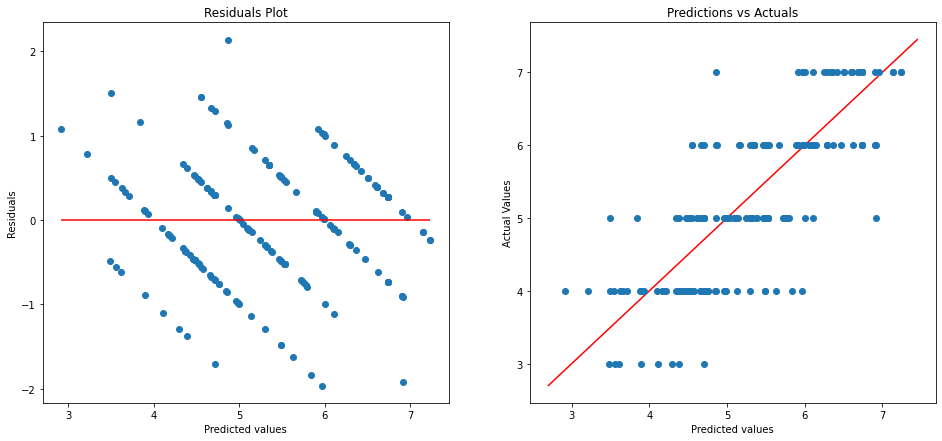

In [39]:
# plot residuals and prediction vs actual

plot_pred(lasso_tuned, X_test_sc, y_test)

In [40]:
# add model for comparison

add_model('Lasso with Hyperparameter Tuning', lasso_tuned, X_test_sc, y_test)

,RMSE,R2 Score
Baseline,1.144024,-0.000256
LinReg Default,0.718962,0.624208
Ridge with Hyperparameter Tuning,0.720323,0.628920
Lasso with Hyperparameter Tuning,0.721469,0.622691


# 3.0 Results, Conclusion

## 3.1 Top 10 Model Coefficient

In [41]:
best_model_coef = ridge_tuned.coef_
ridge_coefficient = sorted(zip(map(lambda X: round(X, 4), best_model_coef),X.columns), reverse=True)[:10]
ridge_10_best=[k[1] for k in sorted(ridge_coefficient, key = lambda X : X, reverse = True)[:10]]

In [42]:
print(ridge_10_best)

['Ma Sub Achievement', 'Ma Compl. Of Work', 'Ma Teacher_Gtu', 'Ma ATL', 'Ma Teacher_CLe', 'Ma Teacher_CNa', 'Ma Teacher_DCh', 'Ma Std_SL', 'Ma Teacher_ RCh', 'Ma Std_ HL']


## 3.2 Comparison of Model's Prediction, Actual Grades, Predicted Grades (from teacher)

In [43]:
X_test.head(2)

,Ma ATL,Ma Compl. Of Work,Ma Sub Achievement,Ma Std_ HL,Ma Std_ SL,Ma Std_HL,Ma Std_SL,Ma Teacher_ BGe,Ma Teacher_ CLe,Ma Teacher_ CNa,Ma Teacher_ FBe,Ma Teacher_ RCh,Ma Teacher_ SSn,Ma Teacher_BGe,Ma Teacher_CLe,Ma Teacher_CNa,Ma Teacher_DCh,Ma Teacher_FBe,Ma Teacher_FYi,Ma Teacher_GGo,Ma Teacher_GTu,Ma Teacher_Gtu,Ma Teacher_JTo,Ma Teacher_LLP,Ma Teacher_RCh,Ma Teacher_TSS
668,7.0,7.0,7.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
231,6.0,6.0,4.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [44]:
# rounding the results off to nearest whole number using the best model

y_test_pred = ridge_tuned.predict(X_test_sc).round().astype('int')

In [45]:
# create a column in X_test called model predictiuon that stores the model's predicted grades

X_test['model prediction'] = y_test_pred

In [46]:
# map back the actual grades given by IB to the consecutive index

X_test['Actual Grade'] = df.loc[X_test.index, 'Actual Grade']

In [47]:
# map back the predicted grades given by teachers to the consecutive index

X_test['Predicted Grade'] = df.loc[X_test.index, 'Predicted Grade']

In [48]:
X_test.head()

,Ma ATL,Ma Compl. Of Work,Ma Sub Achievement,Ma Std_ HL,Ma Std_ SL,Ma Std_HL,Ma Std_SL,Ma Teacher_ BGe,Ma Teacher_ CLe,Ma Teacher_ CNa,Ma Teacher_ FBe,Ma Teacher_ RCh,Ma Teacher_ SSn,Ma Teacher_BGe,Ma Teacher_CLe,Ma Teacher_CNa,Ma Teacher_DCh,Ma Teacher_FBe,Ma Teacher_FYi,Ma Teacher_GGo,Ma Teacher_GTu,Ma Teacher_Gtu,Ma Teacher_JTo,Ma Teacher_LLP,Ma Teacher_RCh,Ma Teacher_TSS,model prediction,Actual Grade,Predicted Grade
668,7.0,7.0,7.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7,7.0,7.0
231,6.0,6.0,4.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,5.0,6.0
447,6.0,6.0,5.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5,6.0,5.0
340,6.0,5.0,4.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,5.0,5.0
76,7.0,7.0,7.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7,7.0,7.0


In [49]:
#increase pandas default max_rows so I can view all columns at once

X_test[['model prediction','Actual Grade','Predicted Grade']]

,model prediction,Actual Grade,Predicted Grade
668,7,7.0,7.0
231,5,5.0,6.0
447,5,6.0,5.0
340,5,5.0,5.0
76,7,7.0,7.0
...,...,...,...
325,5,5.0,6.0
267,5,6.0,6.0
143,5,3.0,5.0
286,5,4.0,6.0


In [50]:
temp_df1= X_test[['model prediction','Actual Grade','Predicted Grade']].reset_index()

In [51]:
newlist = temp_df1.loc[:,'Actual Grade']  - temp_df1.loc[:,'Predicted Grade']
newlist[:10]

0    0.0
1   -1.0
2    1.0
3    0.0
4    0.0
5    1.0
6    0.0
7    1.0
8   -1.0
9    0.0
dtype: float64

This shows that the teacher's predictions will either: remain the same the actual grade, student will either 1 grade above or 1 grade below from their predicted grade. This was also seen in the EDA notebook.

Let's calculate the RMSE of the predicted grades that was given by teachers from their professional point of view.

In [52]:
from sklearn.metrics import mean_squared_error
import math

actual = X_test['Actual Grade']
predicted = X_test['Predicted Grade']
mse = mean_squared_error(actual, predicted)

rmse = math.sqrt(mse)

print(rmse)

0.8101914936669333


## 3.3 Conclusion

From comparisons, 

Predicted Grade given by teacher, RMSE: 0.81019  
LinReg Default, RMSE:	0.718962	  
Ridge with Hyperparameter Tuning, RMSE:	0.720323	
Lasso with Hyperparameter Tuning, RMSE:	0.721469  


This showed that the prediction errors given by machine learning model is much lower compared to that by a human. Yes, Machine Learning models can predict the grades of students. Best model is Ridge with hyperparameter tuning.

However, we must take into account that the actual grades are very much dependent on student to perform consistently well for their final papers as there is a percentage that will taken into account before IB give back their Actual Grades.


